In [1]:
from length_leaf import *
import numpy as np

Using TensorFlow backend.


In [2]:
data = np.load('LeafCounting/data/dataset_folder_5.npz', allow_pickle=True)

In [3]:
x = data['arr_0']

In [4]:
x.shape

(74, 240, 240, 3)

In [5]:
find_centroid(x[20])

(149, 128)

In [6]:
import matplotlib.pyplot as plt

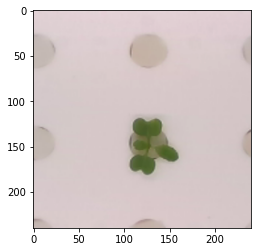

In [7]:
plt.imshow(x[20])

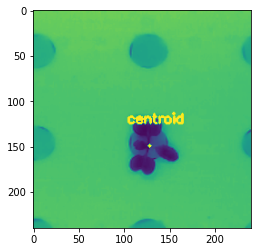

In [6]:
draw_centroid(x[20])

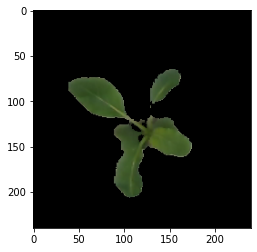

In [9]:
output,mask = extract_leaf(x[10])
plt.imshow(output)

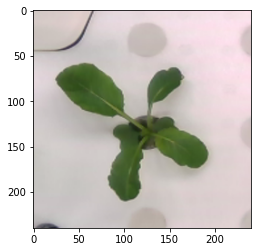

In [10]:
plt.imshow(x[12])

In [17]:
calculate_max_length_leaf(x[32])

102.59142264341595

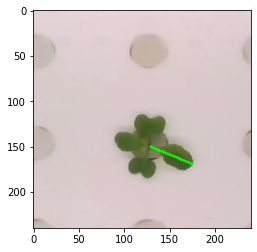

In [14]:
draw_centroid2tip(x[32])

In [13]:
test = load_image("C:/Users/Admin/Desktop/Thesis/ModelResults/Model v1/model.png", default_size)

In [14]:
draw_length_leaf("C:/Users/Admin/Desktop/Thesis/ModelResults/Model v1/model.png")

Invalid image!


In [15]:
draw_centroid(test)

Invalid image!


In [16]:
calculate_max_length_leaf(test)

0

In [17]:
length_leaf("C:/Users/Admin/Desktop/Thesis/ModelResults/Model v1/model.png")

0

In [18]:
centroid = find_centroid(x[20])

In [19]:
contours_pixels = find_contours(x[20])

In [20]:
centroid

(149, 128)

In [21]:
len(contours_pixels)

277

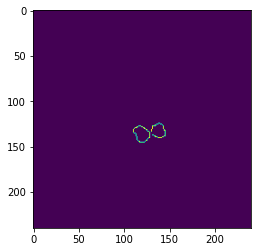

In [22]:
leaf_image, leaf_mask = extract_leaf(x[0])
edges = cv2.Canny(leaf_mask, 100, 1200)
plt.imshow(edges)

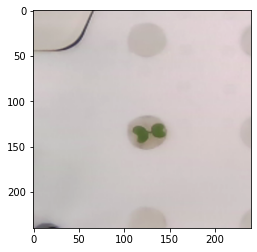

In [23]:
plt.imshow(x[0])

In [24]:
index = 20
test = x[index].copy()
leaf_image, leaf_mask = extract_leaf(x[index])
centroid = find_centroid(x[index])
image = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(leaf_mask, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [25]:
index = 20
centroid = find_centroid(x[index])
contours = find_external_contours(x[index])
contours = find_good_contours(contours, 10)

In [26]:
def draw_point(np_image, point):
    cv2.circle(np_image, tuple(point), 1, (0, 255, 0), -1)   

In [27]:
test = x[index].copy()
for point in contours[0]:
    draw_point(test, point[0])

In [23]:
import math
lengths = []
for contour in contours:
    lengths_of_contour = []
    for pixel in contour:
        point = tuple(pixel[0])
        length = math.sqrt((centroid[1] - point[0])**2 + (centroid[0] - point[1])**2)
        lengths_of_contour.append(length)
    
    lengths.append(lengths_of_contour)

In [29]:
max(lengths[0])

33.61547262794322

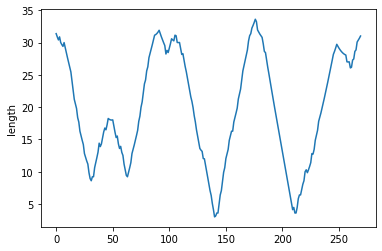

In [30]:
plt.plot(lengths[0])
plt.ylabel('length')
plt.show()

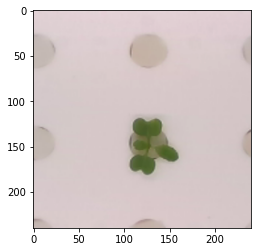

In [31]:
plt.imshow(x[index])

In [32]:
calculate_max_length_leaf(x[index])

34.0147027033899

In [33]:
idx = [i for i in range(len(lengths[0]))]

In [34]:
f = np.polynomial.chebyshev.Chebyshev.fit(idx, lengths[0],30)

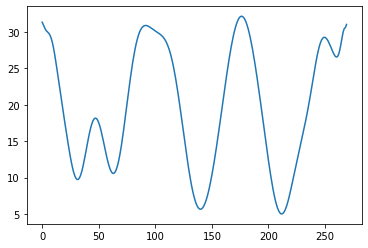

In [35]:
plt.plot([f(i) for i in idx])

In [36]:
max([f(i) for i in idx])

32.15645151870631

In [185]:
def find_next(f, xs, i):
    return f(i+1)  

In [186]:
def find_prev(f, xs, i):
    return f(i-1)

In [39]:
def find_extreme(f, xs):
    extreme_values = []
    extreme_xs = []
    for i in range(len(xs)):
        if f(i) > find_prev(f, xs, i) and f(i) > find_next(f, xs, i):
            extreme_values.append(f(i))
            extreme_xs.append(i)
    return extreme_values, extreme_xs

In [40]:
value, locate = find_extreme(f, idx)

In [41]:
value

[31.335163556293708,
 18.170385014778272,
 30.884572932362634,
 32.15645151870631,
 29.258985066450787]

In [42]:
locate

[0, 47, 91, 176, 249]

In [18]:
def calculate_average_length_leaf(np_image, coef_x=1, coef_y=1):
    leaf_image, leaf_mask = extract_leaf(np_image)
    centroid = find_centroid(np_image)
    contours = find_external_contours(np_image)
    contours = find_good_contours(contours, 10)
    
    lengths = []
    for contour in contours:
        lengths_of_contour = []
        for pixel in contour:
            point = tuple(pixel[0])
            length = math.sqrt((coef_x*(centroid[1] - point[0]))**2 + (coef_y*(centroid[0] - point[1]))**2)
            lengths_of_contour.append(length)
        lengths.append(lengths_of_contour)
    
    length_leafs = []
    for length in lengths:
        idx = [i for i in range(len(length))]
        f = np.polynomial.chebyshev.Chebyshev.fit(idx, length, 20)
        value, locate = find_extreme(f, idx)
        length_leafs += [length[i] for i in locate]
        
    length_average = sum(length_leafs)/len(length_leafs)
    return length_average

In [44]:
calculate_average_length_leaf(x[30])

C:\Users\Admin\Anaconda3\envs\environment\lib\site-packages\numpy\polynomial\chebyshev.py:1647: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


64.31127708479276

In [808]:
index = 54
np_image = x[index]
leaf_image, leaf_mask = extract_leaf(np_image)
centroid = find_centroid(np_image)
contours = find_external_contours(np_image)
contours = find_good_contours(contours, 10)

In [809]:
len(contours)

1

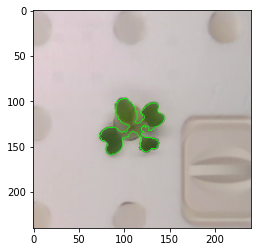

In [810]:
test = np_image.copy()
plt.imshow(cv2.drawContours(test, contours, -1, (0,255,0)))

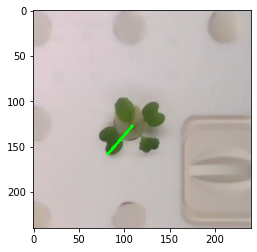

In [811]:
draw_centroid2tip(np_image)

In [812]:
coef_x = 1
coef_y = 1
lengths = []
for contour in contours:
    lengths_of_contour = []
    for pixel in contour:
        point = tuple(pixel[0])
        length = math.sqrt((coef_x*(centroid[1] - point[0]))**2 + (coef_y*(centroid[0] - point[1]))**2)
        lengths_of_contour.append(length)
    lengths.append(lengths_of_contour)

In [813]:
def choose_deg(length):
    if len(length) < 100:
        return 10
    elif len(length) >= 100 and len(length) < 200:
        return 20
    else:
        return 30

In [814]:
# def remove_bad_extreme(extreme_locate):

In [815]:
def padding_length(ls, x):
    if x > len(ls):
        return ls
    else:
        return ls[-x:] + ls + ls[:x]

In [816]:
def padding_idx(ls, x):
    if x > len(ls):
        return ls
    else:
        return [i for i in range(-x, 0, 1)] + ls + [len(ls)+i for i in range(x)]

In [817]:
length_leafs = []
for length in lengths:
    idx = [i for i in range(len(length))]
    f = np.polynomial.chebyshev.Chebyshev.fit(padding_idx(idx, 20), padding_length(length, 20), choose_deg(length))
    value, locate = find_extreme(f, idx)
    length_leafs += [length[i] for i in locate]

In [818]:
len(lengths[0])

345

In [819]:
length_leafs

[31.622776601683793, 39.6232255123179, 35.35533905932738, 32.7566787083184]

In [820]:
locate

[0, 101, 181, 265]

In [821]:
calculate_max_length_leaf(x[index])

41.10960958218893

In [822]:
max(lengths[0])

40.45985664828782

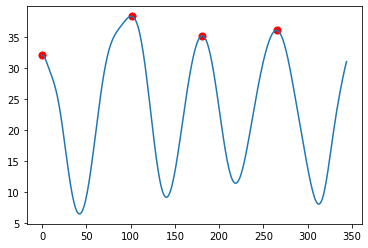

In [823]:
plt.plot([f(i) for i in idx])
for lc in locate:
    plt.scatter(lc, f(lc), s=50, c='red', marker='o')

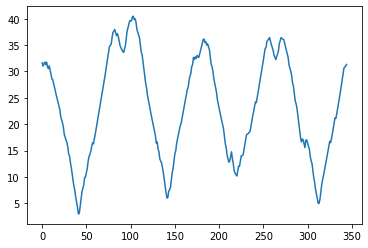

In [824]:
plt.plot(lengths[-1])

In [825]:
contours[0][10]

array([[ 92, 103]], dtype=int32)

In [826]:
len(lengths[0])

345

In [827]:
sum(length_leafs)/len(length_leafs)

34.839504970411866

In [828]:
draw_image = x[index].copy()

In [829]:
def draw_redlines(np_image, locates):
    draw_image = np_image.copy()
    for locate in locates:
        cv2.circle(draw_image, locate, 2, (255,0,0), -1)
    plt.imshow(draw_image)

In [830]:
locate_image = []
for lc in locate:
    locate_image.append(tuple(contours[-1][lc][0]))

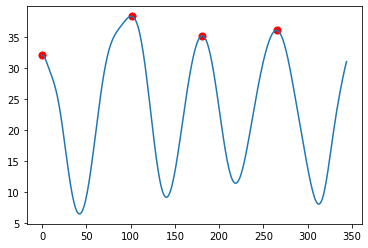

In [831]:
plt.plot([f(i) for i in idx])
for lc in locate:
    plt.scatter(lc, f(lc), s=50, c='red', marker='o')

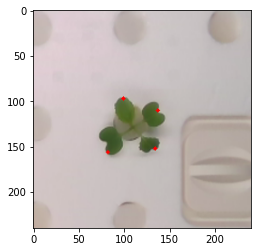

In [832]:
draw_redlines(x[index], locate_image)